# This script plots the histogram of FWEA SE Asia slow region and ocerlay plots the other regions compared after NORMALISATION


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Reading /media/rupak/Rupak_4TB/BACKUPS/FWI/average_plot/abs_Vs/v5/vertical_avg/files/vertically_avg_Vs_100_to_220_km_SE_Asia_WITHOUT_KP
length of vs_array_FWEA: 4224
No of bin with an interval of 0.01 is 34
The spatial average of the vertically averaged Vs from 100 to 220 is 4.357182555409826
Moving to GLAD-M25
length of vs array from GLAD-M25 :68972
The min Vs is 4.273928749741343
The max Vs is 4.598830567077801
No of bins for histogram with an interval of 0.01 = 32
Spatial average of Pacific is 4.4194145928874145


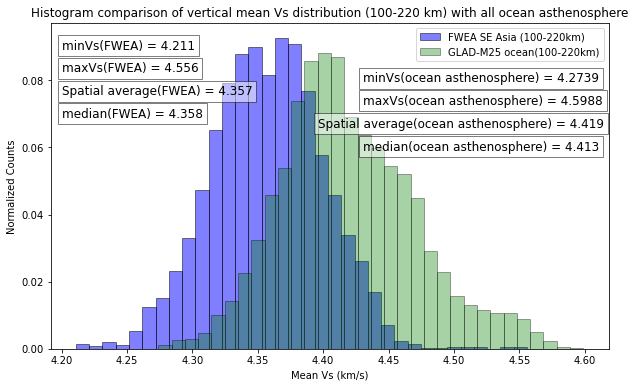

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# File paths and parameters
dpath=f'/media/rupak/Rupak_4TB/BACKUPS/MANUSCRIPTS_Rupak/SE_ASIA_MANU_DRAFTS/MERGED/Manu_figs_organised/text_fig/GitHub_upload/vertical_avg/files' #FWEA23 SE asia Vs
#fdp=80
#fdp=90
fdp=100
#fdp=110
#fdp=120
#fdp=140
edp=220
fname=os.path.join(dpath,f'vertically_avg_Vs_{fdp}_to_{edp}_km_SE_Asia_WITHOUT_KP')
print(f"Reading {fname}")


vs_list=[]
with open(fname, 'r') as fi:
    for li in fi:
        row = li.strip().split()
        vs = float(row[2])
        vs_list.append(vs)

# Convert to array
vs_array_FWEA = np.array(vs_list)
len_vs_array_FWEA=len(vs_array_FWEA)
print(f"length of vs_array_FWEA: {len_vs_array_FWEA}")

min_Vs_FWEA = np.min(vs_array_FWEA)
max_Vs_FWEA = np.max(vs_array_FWEA)
div = 0.01
binFWEA = int((max_Vs_FWEA - min_Vs_FWEA) / div)
print(f"No of bin with an interval of {div} is {binFWEA}")

# Mean and median
mean_FWEA = np.mean(vs_array_FWEA)
median_FWEA = np.median(vs_array_FWEA)
print(f"The spatial average of the vertically averaged Vs from {fdp} to {edp} is {mean_FWEA}")

print(f"Moving to GLAD-M25")

# Second dataset from GLAD-M25
dpath_ot=f"/media/rupak/Rupak_4TB/BACKUPS/MANUSCRIPTS_Rupak/SE_ASIA_MANU_DRAFTS/MERGED/Manu_figs_organised/text_fig/GitHub_upload/GLAD-M25/files"
dpath_ott=f"/media/rupak/Rupak_4TB/BACKUPS/MANUSCRIPTS_Rupak/SE_ASIA_MANU_DRAFTS/MERGED/Manu_figs_organised/text_fig/GitHub_upload/GLAD-M25/files"
fl=os.path.join(dpath_ot,f"GLAD_all_ocean_{fdp}_to_{edp}_compilation.txt")

vs_lst = []
with open(fl, 'r') as f:
    for line in f:
        row = line.strip().split()
        vs = float(row[2])
        vs_lst.append(vs)
vs_array = np.array(vs_lst)
len_vs_array = len(vs_array)
print(f"length of vs array from GLAD-M25 :{len_vs_array}")

min_Vs = vs_array.min()
max_Vs = vs_array.max()
incre = 0.01
bin = int((max_Vs - min_Vs) / incre)

sp_avg = np.mean(vs_array)
median = np.median(vs_array)
print(f"The min Vs is {min_Vs}")
print(f"The max Vs is {max_Vs}")
print(f"No of bins for histogram with an interval of {incre} = {bin}")
print(f"Spatial average of Pacific is {sp_avg}")

# Normalize arrays by their respective spatial averages
#vs_array_FWEA_norm = vs_array_FWEA / mean_FWEA  # Normalize FWEA array by its own mean
#vs_array_norm = vs_array / mean_FWEA # Normalise by the spatial avg from FWEA
#vs_array_norm = vs_array / sp_avg  # Normalize Pacific array by its own mean
##vs_array_FWEA_norm = vs_array_FWEA / max_Vs #Normalising with the highest Vs from GALD-M25
##vs_array_norm = vs_array / max_Vs #Normalising with the highest Vs from GALD-M25
#print(f'vs_array_FWEA_norm:{vs_array_FWEA_norm}')
#print(f'vs_array_norm:{vs_array_norm}')

# Plotting
ofig_ps = os.path.join(dpath_ott, f"Comp_hist_GLAD_vertically_avg_Vs_{fdp}_to_{edp}_km_all_Ocean_compilation_normalised.ps")
ofig_png = os.path.join(dpath_ott, f"Comp_hist_GLAD_vertically_avg_Vs_{fdp}_to_{edp}_km_all_Ocean_compilation_normalised.png")

plt.figure(figsize=(10, 6))

# Histogram for normalized FWEA data. Normalising the x axis (Vs)
#plt.hist(vs_array_FWEA_norm, bins=binFWEA, color='blue', edgecolor='black', alpha=0.5, label=f'FWEA SE Asia(Normalized by {max_Vs:.2f})')

# Histogram for normalized Pacific data. Normalising the x axis (Vs)
#plt.hist(vs_array_norm, bins=bin, color='green', edgecolor='black', alpha=0.35, label=f'GLAD-M25 ocean({fdp}-{edp}km) (Normalized by {max_Vs:.2f})')

##Normalising the Y-AXIS 
# Normalize by the length of vs_array_FWEA and vs_array
weights_FWEA = np.ones_like(vs_array_FWEA) / len_vs_array_FWEA
weights_GLAD = np.ones_like(vs_array) / len_vs_array
#print(f'weights_FWEA={weights_FWEA}')

# Histogram for FWEA data (absolute values on X-axis)
plt.hist(vs_array_FWEA, bins=binFWEA, weights=weights_FWEA, color='blue', edgecolor='black', alpha=0.5, label=f'FWEA SE Asia ({fdp}-{edp}km)')

# Histogram for GLAD-M25 data (absolute values on X-axis)
plt.hist(vs_array, bins=bin, weights=weights_GLAD, color='green', edgecolor='black', alpha=0.35, label=f'GLAD-M25 ocean({fdp}-{edp}km)')


# Titles and labels
plt.title(f"Histogram comparison of vertical mean Vs distribution ({fdp}-{edp} km) with all ocean asthenosphere")
plt.xlabel("Mean Vs (km/s)")
plt.ylabel("Normalized Counts")
plt.legend()

# Annotating the plot
plt.text(0.02, 0.95, f'minVs(FWEA) = {min_Vs_FWEA:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.02, 0.88, f'maxVs(FWEA) = {max_Vs_FWEA:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.02, 0.81, f'Spatial average(FWEA) = {mean_FWEA:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.02, 0.74, f'median(FWEA) = {median_FWEA:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.text(0.56, 0.85, f'minVs(ocean asthenosphere) = {min_Vs:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.56, 0.78, f'maxVs(ocean asthenosphere) = {max_Vs:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.48, 0.71, f'Spatial average(ocean asthenosphere) = {sp_avg:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.56, 0.64, f'median(ocean asthenosphere) = {median:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# New label annotation for 'Pacific (Normalized by max Vs)'
#plt.text(0.7, 0.67, 'GLAD-M25-all ocean compliation (Normalized by max Vs)', transform=plt.gca().transAxes,
         #fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
# New label annotation for 'Pacific (Normalized by max Vs)'
#plt.text(0.7, 0.60, 'SE Asia -FWEA (Normalized by max Vs)', transform=plt.gca().transAxes,
         #fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.savefig(ofig_ps)
plt.savefig(ofig_png)

plt.show()